In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

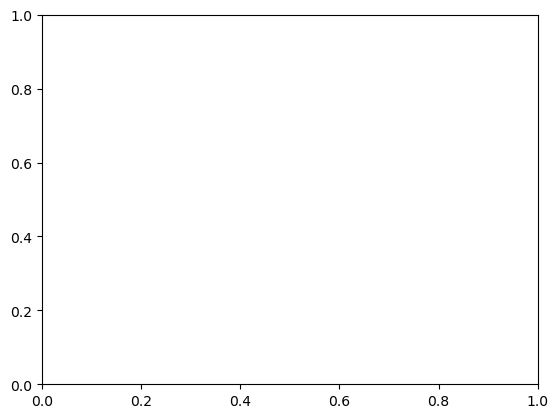

In [4]:
fig, ax = plt.subplots()

In [5]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [6]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

<Axes: xlabel='job_schedule_type'>

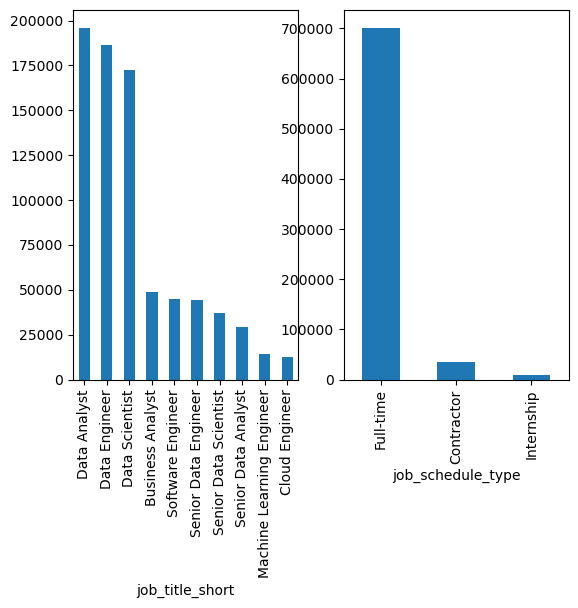

In [8]:
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])

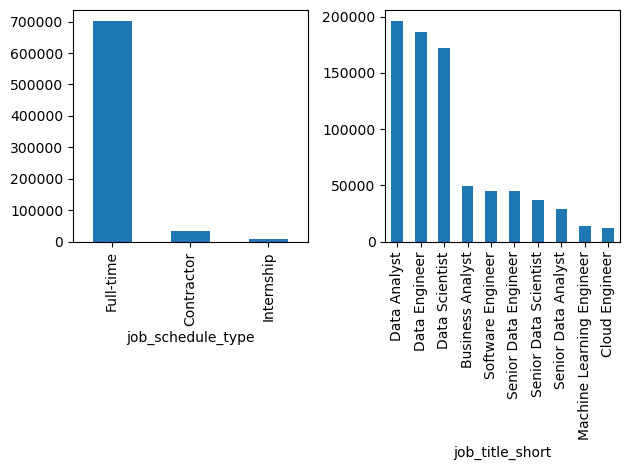

In [9]:
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])

fig.tight_layout()

In [10]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [15]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

0 Data Scientist
1 Data Engineer
2 Data Analyst


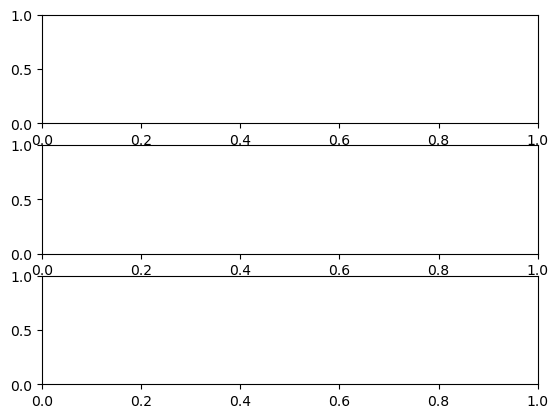

In [16]:
fig, ax = plt.subplots(3, 1) #3 rows and 1 column

for i, job_title in enumerate(job_titles):
    print(i, job_title)

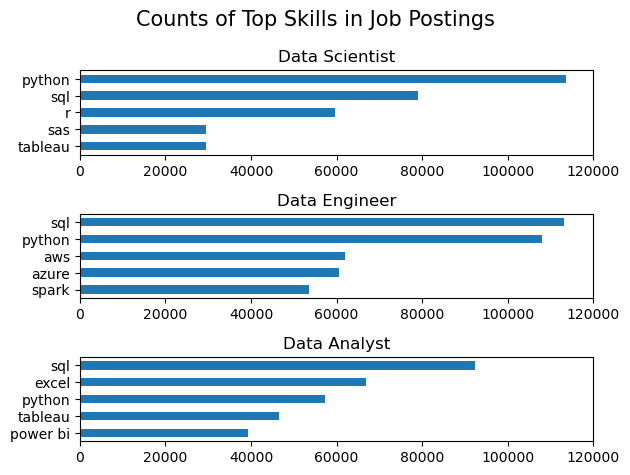

In [25]:
fig, ax = plt.subplots(3, 1) #3 rows and 1 column

for i, job_title in enumerate(job_titles):
    #print(i, job_title)
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis() #descend the y axis
    ax[i].set_ylabel('') #remove the ylabel
    ax[i].legend().set_visible(False) #hide the legend
    ax[i].set_xlim(0, 120000) #adjust the x axis for all three plots


fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15) #title applies to the whole plot area (figure)
fig.tight_layout() #tight always comes last and applys to the whole plot (figure), which is why it is not indented 

🟩 Subplots with Bar Charts (2.13.1) - Problem
Matplotlib Format Charts
Problem Statement:
Create a subplot with 2 rows and 1 column:

In the first subplot, plot a bar chart of the top 3 job locations by the number of job postings.
In the second subplot, plot a horizontal bar chart of the top 3 job titles by the number of job postings.
Use tight_layout() to adjust the spacing between subplots.

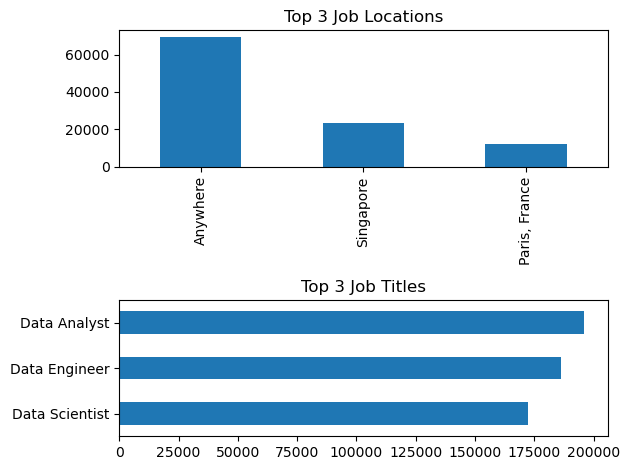

In [42]:
fig, ax = plt.subplots(2, 1) #2 rows and 1 column

df['job_location'].value_counts().head(3).plot(kind='bar', ax=ax[0])
df['job_title_short'].value_counts().head(3).plot(kind='barh', ax=ax[1])

ax[0].set_title('Top 3 Job Locations')
ax[0].set_xlabel('')

ax[1].set_title('Top 3 Job Titles')
ax[1].set_ylabel('')
ax[1].invert_yaxis()


fig.tight_layout()
plt.show()

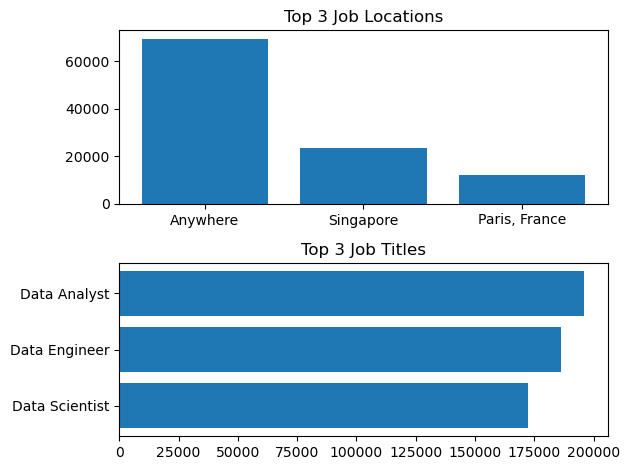

In [43]:
#Final Solution:
fig, ax = plt.subplots(2, 1)

# Top 3 job locations
job_locations = df['job_location'].value_counts().head(3)
ax[0].bar(job_locations.index, job_locations.values)
ax[0].set_title('Top 3 Job Locations')

# Top 3 job titles
job_titles = df['job_title_short'].value_counts().head(3)
ax[1].barh(job_titles.index, job_titles.values)
ax[1].set_title('Top 3 Job Titles')
ax[1].invert_yaxis()

fig.tight_layout()
plt.show()

🟨 Subplots with Job Titles by Schedule (2.13.2) - Problem
Matplotlib Format Charts
Problem Statement:
Create a subplot with 2 rows and 2 columns:

In each subplot, plot a bar chart of the top 3 job titles by the number of job postings for each job schedule type (Full-time, Part-time, Contractor, and Internship).
Use fig.tight_layout() to adjust the spacing between subplots.
Code Needed:
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

In [49]:
df_jobs = df.copy()
df_jobs_count = df_jobs.groupby(['job_schedule_type', 'job_title_short']).size()
df_jobs_count = df_jobs_count.reset_index(name='job_count')
df_jobs_count.sort_values(by='job_count', ascending=False, inplace=True)
df_jobs_count

,job_schedule_type,job_title_short,job_count
38,Full-time,Data Analyst,168975
39,Full-time,Data Engineer,165225
40,Full-time,Data Scientist,153278
36,Full-time,Business Analyst,44106
45,Full-time,Software Engineer,42314
...,...,...,...
185,Part-time and Contractor,Senior Data Scientist,1
183,Part-time and Contractor,Senior Data Analyst,1
182,Part-time and Contractor,Machine Learning Engineer,1
101,"Full-time, Contractor, and Temp work",Cloud Engineer,1


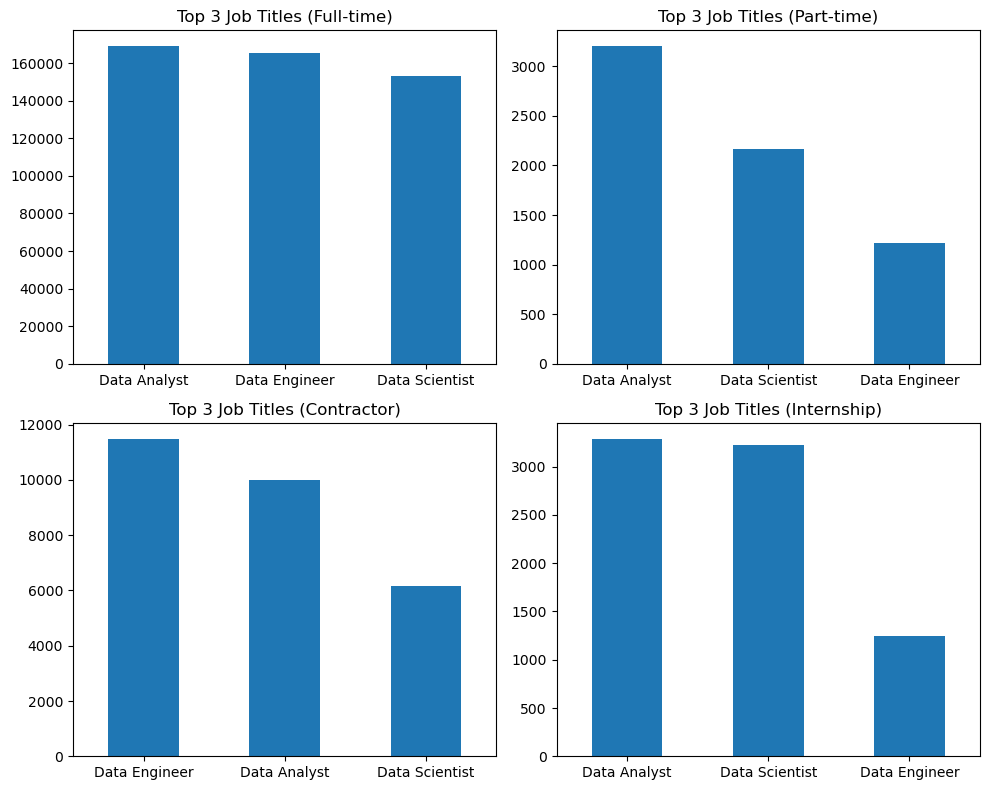

In [76]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

ax = ax.flatten()

schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

for i, schedule in enumerate(schedules):
    #print(i, schedule)
    df_jobs_count[df_jobs_count['job_schedule_type'] == schedule].head(3).plot(kind='bar', x='job_title_short', y='job_count', title=schedule, ax=ax[i])
    ax[i].get_legend().remove()
    ax[i].set_xlabel('')
    ax[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)
    ax[i].set_title(f'Top 3 Job Titles ({schedule})')


fig.tight_layout()
plt.show()

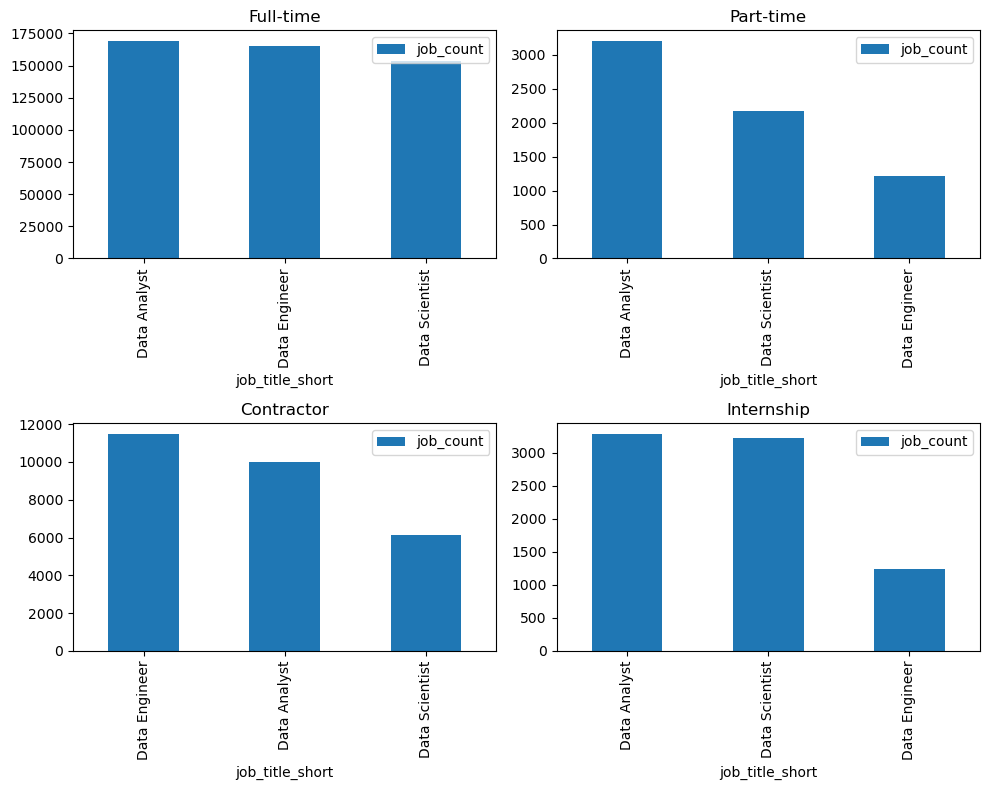

In [67]:
#import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows, 2 columns

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

for i, schedule in enumerate(schedules):
    # Filter the data for the specific schedule
    df_jobs_count[df_jobs_count['job_schedule_type'] == schedule].head(3).plot(
        kind='bar', x='job_title_short', y='job_count', title=schedule, ax=axes[i]
    )

# Adjust layout to prevent overlap
fig.tight_layout()

# Display the plots
plt.show()

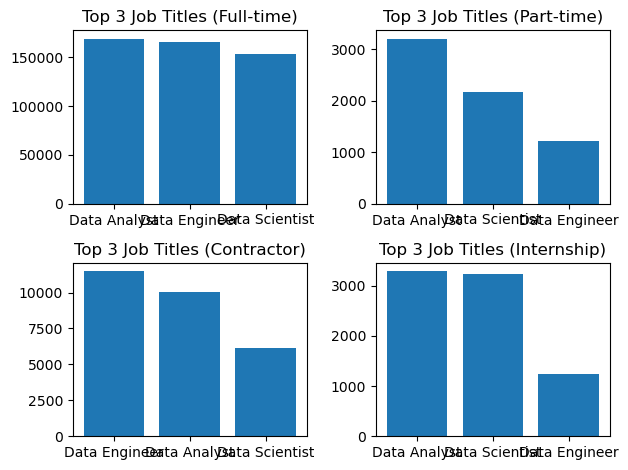

In [77]:
#Final solution:
fig, ax = plt.subplots(2, 2)

# Job schedule types
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

for i, schedule in enumerate(schedules):
    df_schedule = df[df['job_schedule_type'] == schedule]
    job_titles = df_schedule['job_title_short'].value_counts().head(3)
    ax[i//2, i%2].bar(job_titles.index, job_titles.values)
    ax[i//2, i%2].set_title(f'Top 3 Job Titles ({schedule})')

fig.tight_layout()
plt.show()

🟥 Top Skills for Job Roles Subplots (2.13.3) - Problem
Matplotlib Format Charts
Problem Statement:
Create a subplot with 3 rows and 1 column:

In each subplot, plot a horizontal bar chart of the top 3 job skills by the number of job postings for each job title (Senior Data Scientist, Senior Data Engineer, and Senior Data Analyst).
Use fig.tight_layout() to adjust the spacing between subplots and invert_yaxis() to invert the y-axis in each subplot.
Code Needed:
job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']

In [78]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


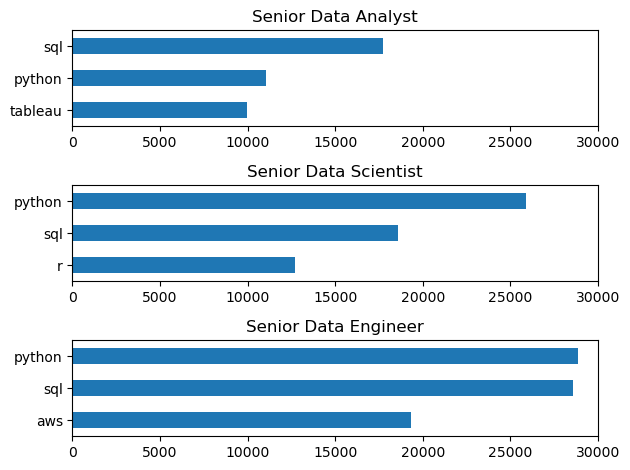

In [81]:
fig, ax = plt.subplots(3, 1)

job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']

for i, job_role in enumerate(job_roles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_role].head(3)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_role)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,30000)

fig.tight_layout()
plt.show()